<a href="https://colab.research.google.com/github/antorobin628/predicting-student-pass-or-fail/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


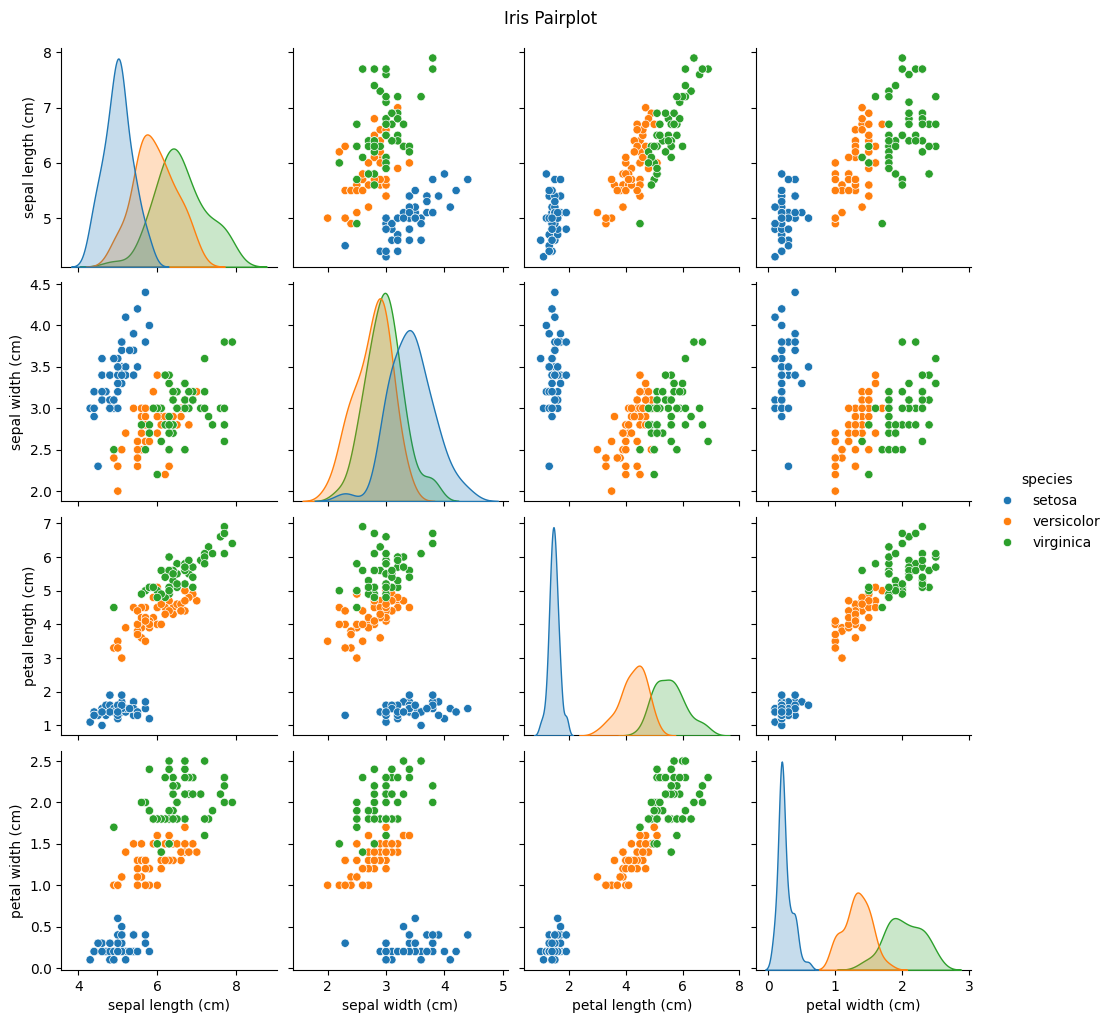

Accuracy Score: 1.00


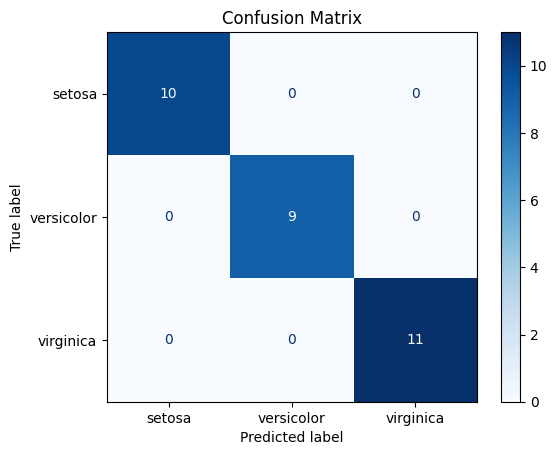

In [1]:
# 1. Import required libraries
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 2. Load the Iris dataset and convert to DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))

# 3. Explore the data
print("First 5 rows of the dataset:")
print(df.head())

# Plot pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Iris Pairplot", y=1.02)
plt.show()

# Alternatively: plot histograms
# df.hist(bins=20, figsize=(10, 6))
# plt.tight_layout()
# plt.show()

# 4. Split the data
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Apply K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)

# 6. Train the model and predict
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 7. Evaluate the model
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
